In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [26]:
house=pd.read_csv('USA_Housing.csv')

In [3]:
house.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


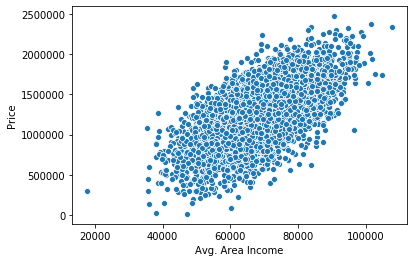

In [5]:
sns.scatterplot(data=house,x='Avg. Area Income',y='Price')

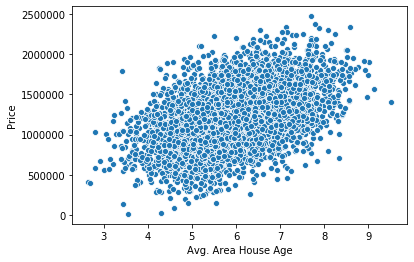

In [6]:
sns.scatterplot(data=house,x='Avg. Area House Age',y='Price')

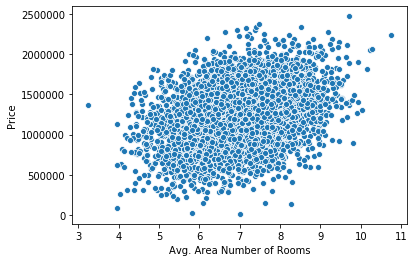

In [7]:
sns.scatterplot(data=house,x='Avg. Area Number of Rooms',y='Price')

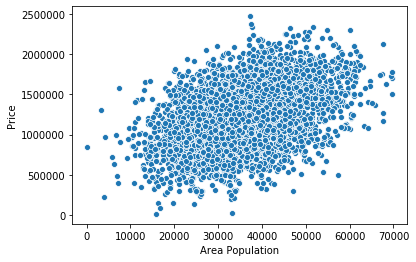

In [8]:
sns.scatterplot(data=house,x='Area Population',y='Price')

In [20]:
# house1=pd.DataFrame()

In [27]:
def address(x):
    if x[0]=='-':
        return x[1:]
    else:
        return x


house['Address_number']=house['Address'].apply(lambda x: address(x[-5:]))

In [18]:
house['Address']

0       208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1       188 Johnson Views Suite 079\nLake Kathleen, CA...
2       9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3                               USS Barnett\nFPO AP 44820
4                              USNS Raymond\nFPO AE 09386
5       06039 Jennifer Islands Apt. 443\nTracyport, KS...
6       4759 Daniel Shoals Suite 442\nNguyenburgh, CO ...
7          972 Joyce Viaduct\nLake William, TN 17778-6483
8                               USS Gilbert\nFPO AA 20957
9                        Unit 9446 Box 0958\nDPO AE 97025
10      6368 John Motorway Suite 700\nJanetbury, NM 26854
11      911 Castillo Park Apt. 717\nDavisborough, PW 7...
12      209 Natasha Stream Suite 961\nHuffmanland, NE ...
13      829 Welch Track Apt. 992\nNorth John, AR 26532...
14                       PSC 5330, Box 4420\nAPO AP 08302
15         2278 Shannon View\nNorth Carriemouth, NM 84617
16       064 Hayley Unions\nNicholsborough, HI 44161-1887
17          54

In [30]:
house['Address_number']

0        5101
1       48958
2        3489
3       44820
4       09386
5       16077
6       20247
7        6483
8       20957
9       97025
10      26854
11      78603
12      52457
13       5136
14      08302
15      84617
16       1887
17      54755
18      71255
19       4733
20       5197
21      85833
22       2855
23       0804
24       5806
25      61227
26      72798
27       2814
28      22365
29       3832
30       7224
31       9110
32       6041
33      27442
34       6766
35       4811
36      63585
37      73336
38      70848
39       6127
40      72956
41      27155
42      99370
43       9802
44      49213
45       0764
46       8027
47      04678
48      17971
49       7554
50      19656
51      70370
52      57690
53       4964
54      69143
55      95266
56       8754
57       2955
58      42699
59      36544
60       1536
61      22884
62       1278
63      70847
64       5282
65      76460
66      66971
67       3319
68       8602
69       1483
70      63237
71    

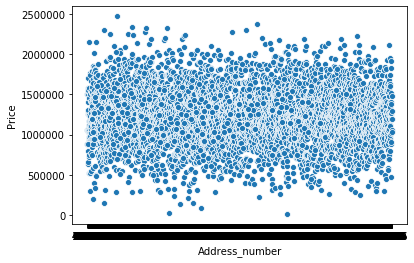

In [31]:
sns.scatterplot(data=house,x='Address_number',y='Price')

In [34]:
len(house['Address_number'].value_counts())

4685

In [38]:
house.drop('Address',axis=1,inplace=True)
house.drop('Address_number',axis=1,inplace=True)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
from sklearn.model_selection import train_test_split

In [43]:
X = house.drop('Price',axis=1).values
y = house['Price'].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler=MinMaxScaler()

In [47]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [48]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
pred=model.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
mean_squared_error(y_test,pred)**0.5

100068.37651617396